# **Lectura de datos Geoespaciales**

**GeoPandas** es una de las bibliotecas más utilizadas en Python para la manipulación y análisis de datos geoespaciales. Su función **[read_file](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html)** permite cargar archivos vectoriales en distintos formatos y convertirlos en un **GeoDataFrame**, lo que facilita su procesamiento y análisis.

En este artículo, exploraremos su funcionamiento, cómo leer distintos formatos vectoriales y qué estrategias aplicar para optimizar la lectura de datos de manera eficiente.

## **1. Función "read_file"**

La función **`read_file`** permite leer archivos geoespaciales y cargarlos en un **GeoDataFrame**, que es la estructura de datos de **GeoPandas** para manejar información geográfica.

### **1.1. Sintaxis**

Su sintaxis es la siguiente:

```{note}
_**`geopandas.read_file`**(filename,
                          layer=None,
                          bbox=None, 
                          mask=None, 
                          columns=None, 
                          rows=None, 
                          engine=None,
                          \*\*kwargs
                        )_
                        

Parámetros principales:

* **`filename`**: (Obligatorio) Ruta del archivo a leer (local o URL).
* **`layer`**: Nombre de la capa si el archivo tiene varias (ejemplo: en un GeoPackage).
* **`bbox`**: Filtra los datos en la lectura usando un bounding box (minx, miny, maxx, maxy).
* **`mask`**: Filtra los datos con una geometría de referencia (ejemplo: un polígono de corte).
* **`rows`**: Número máximo de filas a leer (útil para grandes volúmenes de datos).
* **`columns`**: Selección de columnas específicas para optimizar la carga. 
* **`engine`**: Define el motor de lectura. Desde **GeoPandas 1.0.0**, el valor predeterminado es **pyogrio** si está instalado; de lo contrario, se intenta con **fiona**
```

### **1.2. Funcionamiento interno**

La función **`read_file`** utiliza **Pyogrio** como motor predeterminado para la lectura de archivos vectoriales desde _GeoPandas 1.0.0_. Este motor proporciona un **rendimiento superior**, especialmente al manejar **grandes volúmenes de datos**, y admite una amplia variedad de formatos gracias a su implementación optimizada de OGR.

En versiones anteriores a _GeoPandas 1.0.0_, el motor predeterminado es **Fiona**. Sin embargo, para mejorar el rendimiento en la lectura de archivos de gran tamaño, es posible utilizar **Pyogrio** especificando el parámetro `engine="pyogrio"`.

Veamos qué formatos de archivos vectoriales son compatibles con **Pyogrio** y **Fiona**.

In [1]:
# Formatos soportados por Pyogrio
import pyogrio
pyogrio.list_drivers()

{'PCIDSK': 'rw',
 'PDS4': 'rw',
 'VICAR': 'rw',
 'PDF': 'rw',
 'MBTiles': 'rw',
 'EEDA': 'r',
 'OGCAPI': 'r',
 'ESRI Shapefile': 'rw',
 'MapInfo File': 'rw',
 'UK .NTF': 'r',
 'LVBAG': 'r',
 'OGR_SDTS': 'r',
 'S57': 'rw',
 'DGN': 'rw',
 'OGR_VRT': 'r',
 'Memory': 'rw',
 'CSV': 'rw',
 'GML': 'rw',
 'GPX': 'rw',
 'KML': 'rw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'ESRIJSON': 'r',
 'TopoJSON': 'r',
 'OGR_GMT': 'rw',
 'GPKG': 'rw',
 'SQLite': 'rw',
 'WAsP': 'rw',
 'OpenFileGDB': 'rw',
 'DXF': 'rw',
 'FlatGeobuf': 'rw',
 'Geoconcept': 'rw',
 'GeoRSS': 'rw',
 'VFK': 'r',
 'PGDUMP': 'rw',
 'OSM': 'r',
 'GPSBabel': 'rw',
 'OGR_PDS': 'r',
 'WFS': 'r',
 'OAPIF': 'r',
 'EDIGEO': 'r',
 'SVG': 'r',
 'Idrisi': 'r',
 'ODS': 'rw',
 'XLSX': 'rw',
 'Elasticsearch': 'rw',
 'Carto': 'rw',
 'AmigoCloud': 'rw',
 'SXF': 'r',
 'Selafin': 'rw',
 'JML': 'rw',
 'PLSCENES': 'r',
 'CSW': 'r',
 'VDV': 'rw',
 'MVT': 'rw',
 'NGW': 'rw',
 'MapML': 'rw',
 'GTFS': 'r',
 'PMTiles': 'rw',
 'JSONFG': 'rw',
 'MiraMonVecto

In [2]:
# Formatos soportados por Fiona
import fiona
fiona.drvsupport.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

## **2. Lectura de diferentes formatos vectoriales**

Antes de iniciar la lectura, importaremos **GeoPandas** junto con otras bibliotecas que utilizaremos a lo largo del tutorial.

In [3]:
import geopandas as gpd
import time
import warnings
warnings.filterwarnings("ignore")

### **2.1. Lectura de un archivo Shapefile**

La lectura de archivos Shapefile se realiza de manera sencilla especificando la ruta completa del archivo de la siguiente forma:

In [4]:
# Ruta del archivo Shapefile de DISTRITOS
file = r'D:\Charlie\01_Cartografia\INEI\LIMITES\DISTRITOS.shp'

# Lectura de los datos
distritos = gpd.read_file(
                    file,            # ruta y/o nombre del archivo
                    encoding='UTF-8' # codificiación de carácteres
                )

# Visualizar las dos primeras filas
distritos.iloc[:2, [4, 5, 3, 1, -1]]

,IDDIST,DISTRITO,PROVINCIA,DEPARTAMEN,geometry
0,100902,CODO DEL POZUZO,PUERTO INCA,HUANUCO,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,100904,TOURNAVISTA,PUERTO INCA,HUANUCO,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."


### **2.2. Lectura de un archivo GeoJSON**

Se lleva a cabo de la misma manera que la lectura de un archivo Shapefile.

In [5]:
# Ruta del archivo GJSON de Zonificación Sísmica
fileGJson = r'D:\Charlie\01_Cartografia\SIGRID\PELIGROS\zonificacion_sismica.gjson'

# Lectura de datos
zonSismica = gpd.read_file(
                        fileGJson,        # ruta y/o nombre del archivo
                        encoding='UTF-8'  # codificiación de carácteres
                        )

# Visualizar las dos primeras filas
zonSismica.iloc[:2, list(range(2,7)) + [-1]]

,departamen,provincia,distrito,id_zona,desc_zona,geometry
0,Lima,Lima,Miraflores,Zona III,Depósitos de arenas de compacidad suelta a med...,"POLYGON ((-77.02397 -12.13578, -77.02399 -12.1..."
1,Lima,Lima,San Isidro,Zona I,Zonas de afloramiento de roca con diferentes g...,"POLYGON ((-77.01044 -12.10731, -77.01047 -12.1..."


### **2.3. Lectura de archivos vectoriales desde una URL**

También podemos cargar archivos directamente desde una URL, como en el caso de los GeoJSON disponibles en [geojson.xyz](https://geojson.xyz/). La lectura se realiza de la misma forma que la de un archivo Shapefile o GeoJSON.

In [6]:
# Url del archivo GJSON "ne_110m_land"
url = 'http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson'

# Lectura de datos
land = gpd.read_file(url)

# Visualizar las dos primeras filas
land.head(2)

,scalerank,featureclass,geometry
0,1,Country,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,1,Country,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."


### **2.4. Lectura de una capa específica**

Los formatos vectoriales como **GeoPackage** y **ESRI GeoDatabase** permiten almacenar múltiples capas en un solo archivo. Para estos casos, es necesario especificar la capa a leer; de lo contrario, **GeoPandas** cargará la primera capa por defecto.

En este ejemplo, leeremos una **capa de robos** almacenada en un GeoPackage. Para ello, primero listaremos las capas disponibles con **`gpd.list_layers()`** y así identificar el nombre exacto de la capa.

In [7]:
# Ruta del archivo GPKG de delitos
fileRobos = r'D:\Charlie\01_Cartografia\INEI\Seguridad\delitos.gpkg'
# Listar capas disponibles
gpd.list_layers(fileRobos)

,name,geometry_type
0,robo_frustrado_23,Point
1,robo_agravado_23,Point
2,robo_23,Point
3,robo_mano_armada_23,Point
4,micro_drogas_23,Point
5,hurto_vehiculo_23,Point
6,hurto_23,Point
7,hurto_casa_habitada_23,Point
8,hurto_agravado_23,Point
9,homicidio_arma_de_fuego_23,Point


La capa que leeremos es **"robo_23"**, la cual almacena las ubicaciones de robos denunciados en Perú durante el año 2023, según la fuente Datacrim del INEI.

In [8]:
# Lectura de la capa de robo_23 desde un GPKG
robos = gpd.read_file(
                    fileRobos,      #filename
                    layer='robo_23' #layername
            )

# Visualizar las dos primeras filas
robos.iloc[:2, list(range(1,4)) + [-1]]

,GENERICO,ESPECIFICO,MODALIDAD,geometry
0,DELITOS CONTRA EL PATRIMONIO,ROBO,ROBO,POINT (-80.66159 -5.18755)
1,DELITOS CONTRA EL PATRIMONIO,ROBO,ROBO,POINT (-76.9986 -12.02534)


### **2.5. Lectura desde archivos ZIP**

También es posible leer archivos ZIP que contengan datos geoespaciales. Existen 2 casos para estos:

1. **Una sola capa**:  Ya sea comprimida directamente o dentro de una carpeta, su lectura es directa con solo indicar la ruta completa del archivo ZIP.

2. **Varias capas**: Se debe especificar la ruta completa del archivo ZIP. Si las capas están dentro de una carpeta, también es necesario indicar su nombre.

Exploremos estos casos:

#### **Una sola capa**

Como se mencionó anteriormente, ya sea de forma individual o dentro de una carpeta, su lectura es directa, igual que la de cualquier archivo vectorial. A continuación, realizaremos la lectura de una capa única dentro de un archivo ZIP que contiene una carpeta.

Primero, exploraremos la estructura del archivo ZIP utilizando el comando **`tar`** desde la línea de comandos:

In [9]:
!tar -tf D:/Charlie/01_Cartografia/catastro.zip

data/
data/sectores.json


El archivo comprimido contiene una carpeta llamada **"data"**, dentro de la cual hay un único archivo denominado **"sectores.json"**. Por lo tanto, podemos hacer la lectura directamente:

In [10]:
# Ruta del archivo ZIP de catastro
fileSectores = r'D:\Charlie\01_Cartografia\catastro.zip'

# Lectura de datos
sectores = gpd.read_file(fileSectores, encoding='UTF-8')

# Visualizar las dos primeras filas
sectores.iloc[:2, list(range(1,4))+ [-1]]

,ID_DIST,COD_SECTOR,ID_SECTOR,geometry
0,200605,99,20060599,"POLYGON ((-80.76846 -4.8479, -80.76869 -4.8478..."
1,200401,06,20040106,"POLYGON ((-80.16641 -5.09945, -80.16684 -5.100..."


#### **Varias capas**

Si el archivo ZIP contiene múltiples capas, es necesario **especificar el nombre de la capa** que se desea leer. Si las capas están dentro de una carpeta, también se debe indicar el nombre de esta. A continuación, se muestra cómo especificar la capa según su ubicación dentro del archivo comprimido:

* `.../archivo.zip!filename.shp`: El archivo ZIP contiene las capas comprimidas directamente. En este caso, leeremos la capa **"filename.shp"**.
* `.../archivo.zip!data/filename.shp`: El archivo ZIP contiene una carpeta que almacena múltiples archivos. Aquí, leeremos la capa **"filename.shp"** dentro de la carpeta **"data"**.

Para este ejemplo, utilizaremos el archivo **"cartografia.zip"**, que incluye múltiples capas vectoriales.

In [11]:
!tar -tf D:/Charlie/01_Cartografia/cartografia.zip

data/
data/hab_urbanas.dbf
data/hab_urbanas.prj
data/hab_urbanas.shp
data/hab_urbanas.shx
data/sectores.json


Como se observa, el archivo comprimido contiene una carpeta llamada **"data"**, y dentro de ella, dos archivos: un **shapefile** llamado **"hab_urbanas"** y un **GeoJSON** llamado **"sectores"**.

Leamos el shapefile de **"hab_urbanas"**, especificando su nombre en la ruta. Dado que se encuentra dentro de una carpeta, también debemos incluir el nombre de esta.

In [12]:
# Ruta del archivo ZIP de catastro, especificando la carpeta y la capa
fileBarrios = r'D:\Charlie\01_Cartografia\cartografia.zip!data/hab_urbanas.shp'

# Lectura de datos
barrios = gpd.read_file(fileBarrios, encoding='UTF-8')

# Visualizar las dos primeras filas
barrios.iloc[:2, list(range(1,7)) + [-1]]

,ID_PUEBLO,ID_PUEBLO_,ID_PREDIO_,TIP_POSESI,ID_DIST,NOM_PUEBLO,geometry
0,None,None,None,None,120204,None,"POLYGON ((-75.40033 -11.99747, -75.40015 -11.9..."
1,None,None,None,None,120204,None,"POLYGON ((-75.40125 -11.99556, -75.4012 -11.99..."


## **3. Lectura optimizada**

Cuando trabajamos con grandes volúmenes de datos y no necesitamos cargarlos por completo, aplicar **técnicas de optimización** en la lectura ayuda a mejorar el rendimiento. Podemos utilizar **filtros espaciales** (por BBox o máscara), **seleccionar filas y columnas** específicas o aplicar **condiciones WHERE**, asegurando que solo se carguen los datos esenciales para nuestro proyecto.

### **3.1. Filtro por un BBOX**

El filtrado por **BBOX** (`bbox`) permite cargar únicamente los datos que **intersectan** con un **cuadro delimitador**. Este método es más eficiente en formatos con **indexación espacial** y **filtrado** en la lectura, como GeoPackage y PostGIS, ya que aplica el filtro directamente en la consulta, evitando cargar en memoria geometrías fuera del área de interés.

En el siguiente ejemplo, aplicaremos filtraremos una capa de **robos** almacenada en un GeoPackage. Para ello, utilizaremos el GeoDataFrame de `distritos`, previamente cargado, para obtener el cuadro delimitador del distrito de **"Lince"**.

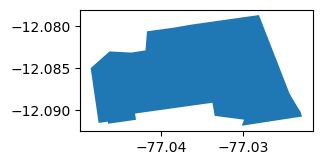

In [13]:
# Filtrar el distrito de Lince desde el 
# GeoDataFrame de "distritos"
lince = distritos[distritos.IDDIST=='150116']
lince.plot(figsize=(3,3));

Obtener el BBOX del distrito de Lince.

In [14]:
# Obtener el BBOX del distrito de Lince:
bboxLince = tuple(lince.total_bounds)
bboxLince

(-77.04858598599986,
 -12.091910229999883,
 -77.02281236099992,
 -12.078710979999869)

Leeremos la capa **"robo_23"** aplicando un filtro espacial basado en el **BBOX** del distrito de Lince.

In [15]:
# lectura de datos con filtro por bbox del distrito de Lince
robo_bbox_lince_23 = gpd.read_file(
                                fileRobos,        # filename
                                layer='robo_23', # layername
                                bbox=bboxLince    # cuadro delimitador
                    )

Visualizando los resultados

In [16]:
# Visualizacion
m = lince.explore(   
                tiles="CartoDB positron",
                style_kwds={'fillOpacity':0, 
                            'weight':4}
               )

robo_bbox_lince_23.explore(m=m,
                    marker_kwds={"color": "red", 
                                   "radius": 8}
                    )

### **3.2. Filtro por máscara**

El filtrado por **máscara** (`mask`) permite cargar únicamente los datos que **intersecten** con una **geometría específica**. Este método es más eficiente en formatos con **indexación espacial** y **filtrado** en la lectura, como GeoPackage y PostGIS, ya que aplican el filtro directamente al leer los datos, evitando cargas innecesarias en memoria.

En el siguiente ejemplo, filtraremos una capa de **robos** almacenada en un GeoPackage utilizando como máscara el GeoDataFrame de `lince`, generado previamente.

In [17]:
# lectura de datos con filtro por máscara del distrito de Lince
robo_lince_23 = gpd.read_file(
                                fileRobos,        # filename
                                layer='robo_23',  # layername
                                mask=lince        # cuadro delimitador
                            )

Visualizando:

In [18]:
# Visualizacion
m = lince.explore(   
                tiles="CartoDB positron",
                style_kwds={'fillOpacity':0, 
                            'weight':4}
               )

robo_lince_23.explore(m=m,
              marker_kwds={"color": "red", 
                           "radius": 8}
             )

### **3.3. Filtro de fila**

El filtrado por filas (`rows`) es útil para previsualizar datos sin cargar el archivo completo en memoria. Podemos especificar un número entero para leer las primeras N filas o una lista de índices para seleccionar filas específicas.

Veamos un ejemplo cargando un archivo de Manzanas, donde leeremos los primero 100 registros y luego los registros desde el 100 al 150:

In [19]:
# Ruta completa del geopackae catastro.gpkg que 
# contiene la capa de manzanas
uriMzna= r'D:\Charlie\01_Cartografia\catastro.gpkg'

# Lectura de los primeros 100 registros
mznaTop = gpd.read_file(uriMzna, 
                        layer='Manzanas',
                        rows= 100)
print(f'Lectura de las primeras {mznaTop.shape[0]} filas')

# Lectura de un subconjunto, de la fila 100 hasta la 150
mznaSubset = gpd.read_file(uriMzna, 
                           layer='Manzanas', 
                           rows= slice(100,150))
print(f'Lectura de un subconjunto de {mznaSubset.shape[0]} filas')

Lectura de las primeras 100 filas
Lectura de un subconjunto de 50 filas


### **3.4. Filtro de columna**

El filtrado por columnas (`columns`) permite especificar únicamente las columnas que deseamos cargar, optimizando así el uso de memoria y el tiempo de procesamiento, especialmente en archivos con muchas columnas innecesarias.

Revisemos las columnas del DataFrame de "mznaTop", que se utilizo para previsualizar una muestra de la capa de manzanas:

In [20]:
mznaTop.columns.values

array(['OBJECTID', 'CENESTE', 'CENNORTE', 'CODIGOSECTOR',
       'CODIGODISTRITO', 'CODIGOMANZANAINEI', 'CODIGOMANZANA',
       'CODIGOMALLA', 'NIVELSOCIOECONOMICO', 'ESTRATOINEI',
       'FUENTEESTRATO', 'NOMBREMANZANA', 'geometry'], dtype=object)

Esta capa contiene muchas columnas, podemos solo seleccionar la columnas de interes para leer todos los datos de la siguiente manera:

In [21]:
# Lectura de toda la capa de manzanas con columnas especificas
manzanas = gpd.read_file(uriMzna, 
                         layer='Manzanas',
                         columns=['OBJECTID','CODIGOMANZANA',
                                  'CODIGODISTRITO','NOMBREMANZANA']
                        )

# Filas y columnas
print(f'Filas y columnas {manzanas.shape}')

# visualizar las primeras 2 filas
manzanas.head(2)

Filas y columnas (129975, 5)


,CODIGODISTRITO,CODIGOMANZANA,NOMBREMANZANA,OBJECTID,geometry
0,150101,1,None,1,"MULTIPOLYGON (((277075.118 8667593.577, 277035..."
1,150101,2,None,2,"MULTIPOLYGON (((276915.102 8667577.125, 276898..."


### **3.5. Filtro WHERE de SQL**

El filtrado con **where** permite cargar únicamente las filas que cumplen con una condición específica, reduciendo la cantidad de datos procesados y optimizando el rendimiento. Esto es especialmente útil cuando trabajamos con grandes volúmenes de datos y solo necesitamos un subconjunto relevante, evitando la carga innecesaria de información.

Volvamos a cargar la data de manzana, pero leyendo solamente las manzanas del distrito de Miraflores (`CODIGODISTRITO='150122'`)

In [22]:
# Lectura de toda la capa de manzanas con columnas especificas
mzna_miraflores = gpd.read_file(uriMzna, 
                                layer='Manzanas',
                                columns=['OBJECTID','CODIGOMANZANA',
                                          'CODIGODISTRITO','NOMBREMANZANA'],
                                where="CODIGODISTRITO='150122'"
                            )

# Filas y columnas
print(f'Filas y columnas {mzna_miraflores.shape}')

# visualizar las primeras 2 filas
mzna_miraflores.head(2)

Filas y columnas (741, 5)


,CODIGODISTRITO,CODIGOMANZANA,NOMBREMANZANA,OBJECTID,geometry
0,150122,11071,None,188919,"MULTIPOLYGON (((281060.121 8659750.262, 281047..."
1,150122,11073,None,188920,"MULTIPOLYGON (((280949.226 8659676.282, 280939..."


In [23]:
# Visualizacion
mzna_miraflores.explore(   
                        tiles="CartoDB positron",
                        style_kwds={'fillOpacity':0.2, 
                                    'weight':4}
                    )

### **3.6. Mejorar el rendimiento con Pyogrio**

Esta sección del tutorial aplica solo a versiones anteriores a _GeoPandas 1.0.0_, donde Fiona es la biblioteca predeterminada para la lectura de archivos vectoriales.

En estas versiones, es posible mejorar el rendimiento utilizando el parámetro **`engine="pyogrio"`**, ya que, como se mencionó previamente, este motor proporciona una interfaz optimizada para la lectura y escritura de datos vectoriales mediante GDAL/OGR.

El rendimiento de **pyogrio** en comparación con Fiona depende de varios factores:

* **Formato del archivo**: **Pyogrio** es más rápido formatos que admiten indexación espacial, como **GeoPackage** o **Postgis**. En **Shapefile** y **GeoJSON**, la ventaja es menor porque deben leerse completamente antes de aplicar filtros.

* **Tamaño del archivo**: En archivos grandes (>1GB), **Pyogrio** puede ser hasta **5 veces más rápido** que **Fiona**, mientras que en archivos pequeños la diferencia es mínima.

* **Uso de hilos**: **Pyogrio** admite lectura paralela en sistemas multinúcleo, mejorando el rendimiento en el acceso a grandes volúmenes de datos.

Compararemos la lectura de datos del mismo archivo utilizando primero Fiona y luego Pyogrio.

In [24]:
# Ruta del archivo Geopackage:
file=r'D:\Charlie\01_Cartografia\catastro.gpkg'

# Crearemos una mascara para filtrar los datos del 
# distrito de San Juan de Lurigancho
sjl = distritos[distritos['IDDIST'] == '150132']

**Lectura de datos con Fiona**

In [25]:
# Tiempo de inicio
start = time.time()

# Lectura de datos utilizando fiona
data = gpd.read_file(file, 
                     layer='puertas', 
                     engine='fiona',
                     mask=sjl
                    )

# Imprimir tiempo de proceso y cantidad de registros
print("Tiempo con Fiona:", time.time() - start)
print('Registros:', data.shape)

Tiempo con Fiona: 17.627899408340454
Registros: (226230, 16)


**Lectura de datos con Pyogrio**

In [26]:
# Tiempo de inicio
start = time.time()

# Lectura de datos utilizando pyogrio (por defecto)
data = gpd.read_file(file, 
                     layer='puertas',
                     mask=sjl
                    )

# Imprimir tiempo de proceso y cantidad de registros
print("Tiempo con Pyogrio:", time.time() - start)
print('Registros:', data.shape)

Tiempo con Pyogrio: 4.9022932052612305
Registros: (226230, 16)


## **4. Conclusión**

La lectura de datos geoespaciales es un paso clave en cualquier flujo de trabajo GIS en Python, y GeoPandas simplifica este proceso mediante la función **`read_file`**, que facilita la carga de archivos vectoriales. Sin embargo, al trabajar con grandes volúmenes de datos, es fundamental optimizar la lectura para mejorar el rendimiento y el uso de memoria.

El uso de formatos con indexación espacial, como GeoPackage o PostGIS, junto con técnicas de filtrado espacial, por filas, columnas o condiciones WHERE, permite reducir la cantidad de datos cargados en memoria. 

Seleccionar el enfoque adecuado según el tamaño de los datos, el formato del archivo y los requisitos de procesamiento permite optimizar significativamente el rendimiento en la lectura de datos geoespaciales.